Проведем exploratory data analysis с датасетом дорожно-транспортных проишествий с участием велосипедистов, ссылка на городской портал г. Мадрида, Испания

https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=20f4a87ebb65b510VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

In [63]:
import pandas as pd
import numpy as np

import folium
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
df_22 = pd.read_csv('C:/Users/mgtqw/data-analysis-notes/df_AccidentesBicicletas_2022.csv', sep = ';')
df_23 = pd.read_csv('C:/Users/mgtqw/data-analysis-notes/df_AccidentesBicicletas_2023.csv', sep = ';')
df_24 = pd.read_csv('C:/Users/mgtqw/data-analysis-notes/df_AccidentesBicicletas_2024.csv', sep = ';')
df = pd.concat([df_22, df_23, df_24], axis = 0)

In [85]:
df.columns

Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga'],
      dtype='object')

In [86]:
# Переведем названия колонок на англ для удобства обращения
df = df.rename(columns={
    'num_expediente': 'case_number',
    'fecha': 'date',
    'hora': 'time',
    'localizacion': 'location',
    'numero': 'number',
    'cod_distrito': 'district_code',
    'distrito': 'district',
    'tipo_accidente': 'accident_type',
    'estado_meteorológico': 'weather_condition',
    'tipo_vehiculo': 'vehicle_type',
    'tipo_persona': 'person_type',
    'rango_edad': 'age_range',
    'sexo': 'gender',
    'cod_lesividad': 'severity_code',
    'lesividad': 'severity',
    'coordenada_x_utm': 'coord_x_utm',
    'coordenada_y_utm': 'coord_y_utm',
    'positiva_alcohol': 'positive_alcohol',
    'positiva_droga': 'positive_drug'
    })

In [87]:
df

,case_number,date,time,location,number,district_code,district,accident_type,weather_condition,vehicle_type,person_type,age_range,gender,severity_code,severity,coord_x_utm,coord_y_utm,positive_alcohol,positive_drug
0,2022S000034,02/01/2022,0:05:00,"CALL. MARIA TERESA SAENZ DE HEREDIA, 6",6,15,CIUDAD LINEAL,Caída,Despejado,Bicicleta EPAC (pedaleo asistido),Conductor,De 25 a 29 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,444.462.918,4.474.808.752,S,NaN
1,2022S000290,05/01/2022,10:45:00,PASEO. MARQUES DE MONISTROL / GTA. PUENTE DE S...,1,10,LATINA,Colisión fronto-lateral,Se desconoce,Bicicleta EPAC (pedaleo asistido),Conductor,De 25 a 29 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,438.584.377,4.473.973.210,N,NaN
2,2022S000292,07/01/2022,13:55:00,"CALL. PICO CLAVERO, 4A",4A,13,PUENTE DE VALLECAS,Caída,Despejado,Bicicleta EPAC (pedaleo asistido),Conductor,De 60 a 64 años,Mujer,6.0,Asistencia sanitaria inmediata en centro de sa...,443.492.680,4.472.691.807,N,NaN
3,2022S000340,08/01/2022,3:00:00,"CALL. HUERTAS, 24",24,1,CENTRO,Caída,Despejado,Bicicleta,Conductor,De 30 a 34 años,Mujer,1.0,Atención en urgencias sin posterior ingreso,440.663.453,4.473.911.843,N,NaN
4,2022S000359,07/01/2022,18:40:00,PQUE. FUENTE CARRANTONA / AUTOV. M-23,0,14,MORATALAZ,Caída,Despejado,Bicicleta,Conductor,De 55 a 59 años,Hombre,6.0,Asistencia sanitaria inmediata en centro de sa...,446.645.011,4.473.884.612,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,2024S018501,31/05/2024,15:14:00,"CALL. SALVADOR ALLENDE, 34A",34A,11,CARABANCHEL,Caída,Despejado,Bicicleta,Conductor,De 55 a 59 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,"435644,585","4468136,331",N,NaN
383,2024S018507,31/05/2024,15:00:00,PASEO. DELICIAS / PLAZA. EMPERADOR CARLOS V,1,2,ARGANZUELA,Colisión lateral,Despejado,Bicicleta,Conductor,De 65 a 69 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,"441179,991","4473168,556",N,NaN
384,2024S018516,31/05/2024,14:30:00,CALL. SESEÑA / CALL. ESCALONA,58,10,LATINA,Atropello a persona,Despejado,Bicicleta,Conductor,De 15 a 17 años,Hombre,14.0,Sin asistencia sanitaria,"434919,097","4471939,439",N,NaN
385,2024S018516,31/05/2024,14:30:00,CALL. SESEÑA / CALL. ESCALONA,58,10,LATINA,Atropello a persona,Despejado,Bicicleta,Peatón,De 70 a 74 años,Hombre,2.0,Ingreso inferior o igual a 24 horas,"434919,097","4471939,439",N,NaN


In [48]:
df = df.drop(['positive_drug'], axis=1)

In [ ]:
Визаулизация

Text(0.5, 1.0, 'Распределение типов аварий')

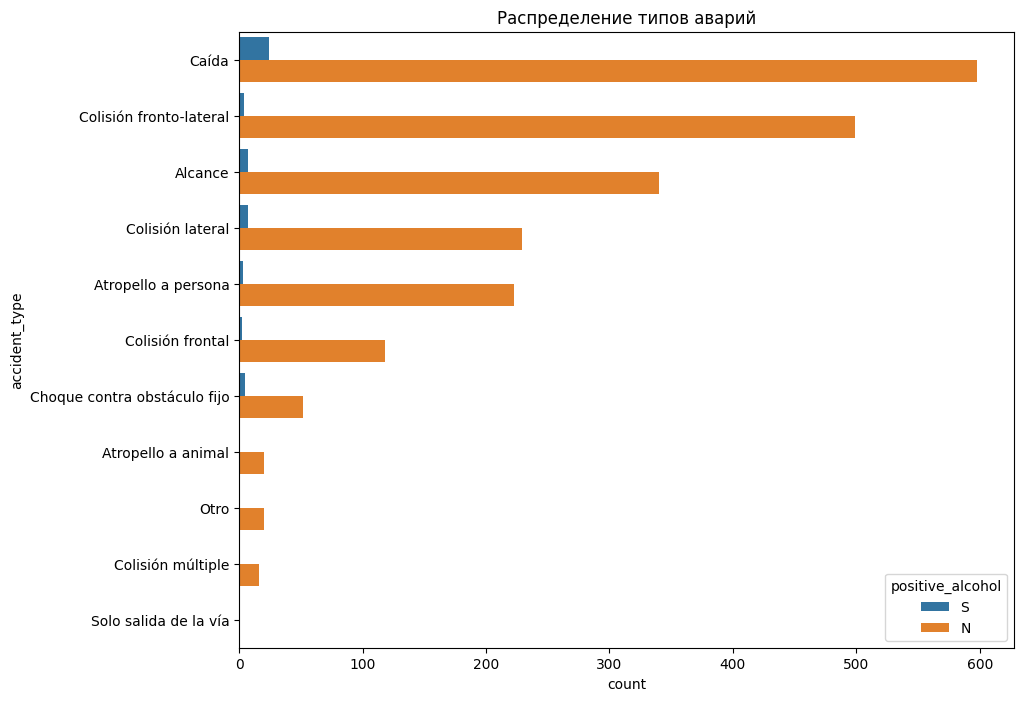

In [88]:
# давайте посмотрим распределение типов аварий в которых учасвуют велосипедисты
plt.figure(figsize = (10, 8))
sns.countplot(y = 'accident_type', hue = df.positive_alcohol, data = df, order = df['accident_type'].value_counts().index)
plt.title('Распределение типов аварий')

Text(0.5, 1.0, 'Погодные условия')

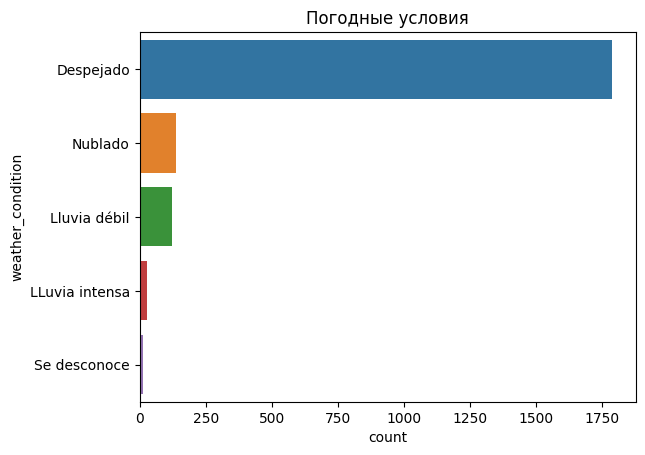

In [69]:
# погодные условия
sns.countplot(y = 'weather_condition', data = df, order = df['weather_condition'].value_counts().index)
plt.title('Погодные условия')

Text(0.5, 1.0, 'Распределения по степени тяжести инцидентов')

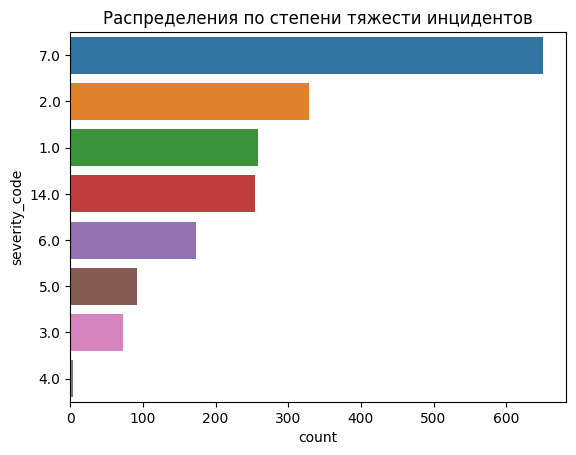

In [70]:
# распределение по степени тяжести травм
sns.countplot(y = 'severity_code', data = df, order = df['severity_code'].value_counts().index)
plt.title('Распределения по степени тяжести инцидентов')

In [90]:
# Преобразование координат в числовой формат
df['coord_x_utm'] = pd.to_numeric(df['coord_x_utm'].str.replace('.', ''), errors='coerce')
df['coord_y_utm'] = pd.to_numeric(df['coord_y_utm'].str.replace('.', ''), errors='coerce')

In [91]:
# Преобразование координат из UTM в широту и долготу
inProj = Proj('epsg:25830')
outProj = Proj('epsg:4326')

In [92]:
def utm_to_latlon(x, y):
    try:
        lon, lat = transform(inProj, outProj, x, y)
        return lat, lon
    except:
        return None, None

In [93]:
df['latitude'], df['longitude'] = zip(*df.apply(lambda row: utm_to_latlon(row['coord_x_utm'], row['coord_y_utm']), axis=1))

C:\Users\mgtqw\AppData\Local\Temp\ipykernel_4596\2787582035.py:3: FutureWarning:

This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1



In [94]:
# Удаление строк с NaN значениями в координатах
df = df.dropna(subset=['latitude', 'longitude'])

In [95]:
# Создание карты
madrid_map = folium.Map(location=[40.4168, -3.7038], zoom_start=12)

In [96]:
# Добавление точек на карту с использованием CircleMarker
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,  # Размер маркера
        popup=f"Case Number: {row['case_number']}, District: {row['district']}, Accident Type: {row['accident_type']}",
        color='blue',  # Цвет маркера
        fill=True,
        fill_color='blue',
        fill_opacity=0.7  # Прозрачность маркера
    ).add_to(madrid_map)

In [98]:
# пока что-то не работает карта-схема, позже доделаю

In [97]:
madrid_map